### Context

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into three parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.

### Dimensionality Reduction

This section of the project entails reducing your dataset to a low dimensional dataset using the t-SNE algorithm or PCA. You will be required to perform your analysis and provide insights gained from your analysis.

#####  Load dataset

In [46]:
# Load dataset
super <- read.csv("Supermarket - Sales Data.csv")
head(super)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


##### Explore the dataset

In [47]:
# Structure of the dataset
str(super)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : Factor w/ 1000 levels "101-17-6199",..: 815 143 654 19 340 734 316 265 703 727 ...
 $ Branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Time                   : Factor w/ 506 levels "10:00","10:01",..: 147 24 156 486 30 394 215 78 342 160 ...
 $ Payment                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3

<b>Observation:</b>
<ul>
    <li>Invoice.ID is a factor, we will need to convert it to numeric since a factor can't have 1000 levels</li>
    <li>We will also need to convert Date and Time columns to the correct data type</li>
</ul>

In [48]:
# DImension of the dataset
dim(super)

[1] 1000   16

<blockquote>The dataset had 1000 rows and 16 columns</blockquote>

In [49]:
# Summary of the dataset
summary(super)

       Invoice.ID  Branch  Customer.type    Gender   
 101-17-6199:  1   A:340   Member:501    Female:501  
 101-81-4070:  1   B:332   Normal:499    Male  :499  
 102-06-2002:  1   C:328                             
 102-77-2261:  1                                     
 105-10-6182:  1                                     
 105-31-1824:  1                                     
 (Other)    :994                                     
                 Product.line   Unit.price       Quantity          Tax         
 Electronic accessories:170   Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Fashion accessories   :178   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Food and beverages    :174   Median :55.23   Median : 5.00   Median :12.0880  
 Health and beauty     :152   Mean   :55.67   Mean   : 5.51   Mean   :15.3794  
 Home and lifestyle    :160   3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453  
 Sports and travel     :166   Max.   :99.96   Max.   :10.00   Max.   :49.6500  
        

In [50]:
library(skimr)
skim(super)

-- Data Summary ------------------------
                           Values
Name                       super 
Number of rows             1000  
Number of columns          16    
_______________________          
Column type frequency:           
  factor                   8     
  numeric                  8     
________________________         
Group variables            None  

-- Variable type: factor -------------------------------------------------------
# A tibble: 8 x 6
  skim_variable n_missing complete_rate ordered n_unique
* <chr>             <int>         <dbl> <lgl>      <int>
1 Invoice.ID            0             1 FALSE       1000
2 Branch                0             1 FALSE          3
3 Customer.type         0             1 FALSE          2
4 Gender                0             1 FALSE          2
5 Product.line          0             1 FALSE          6
6 Date                  0             1 FALSE         89
7 Time                  0             1 FALSE        506
8 Paym

##### Data Cleaning

In [51]:
# Missing Values

# Total missing values in each column 
# by using the function colSums()

colSums(is.na(super))

Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total 
                      0

<blockquote>There are no missing values in the dataset</blockquote>

In [52]:
# Duplicated Data

# duplicated rows in the dataset df 
# and assign to a variable duplicated_rows

duplicated_rows <- super[duplicated(super),]

# Lets print out the variable duplicated_rows and see these duplicated rows 

dim(duplicated_rows)

[1]  0 16

<blockquote>There are no duplicated rows</blockquote>

In [53]:
# Change datatypes to the correct ones:

# To Numeric datatype
g = c('Branch', 'Gender','Customer.type', 'Product.line', 'Payment')
for (i in g){
    super[,i] = as.numeric(super[,i])
}

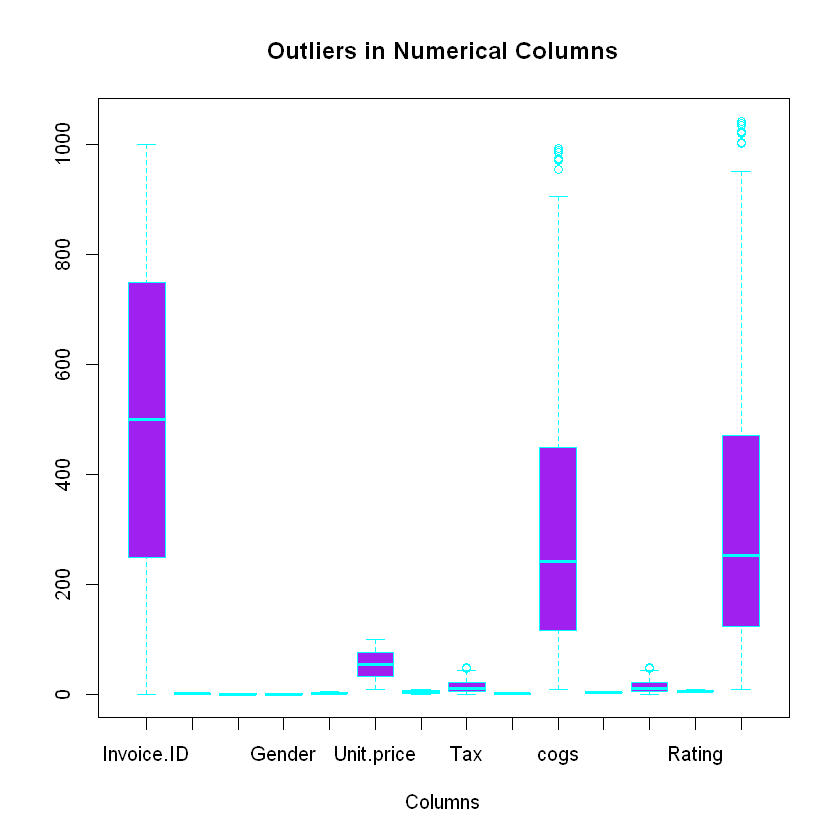

In [54]:
# Outliers

# Subset your data to numerical columns only
num <- super[, c(1,2,3,4,5,6,7,8,11,12,13,14,15,16)]
boxplot(num,
main = "Outliers in Numerical Columns",
xlab = "Columns",
col = "purple",
border = "cyan")

<blockquote>We see some outliers on cogs and Total colums </blockquote>

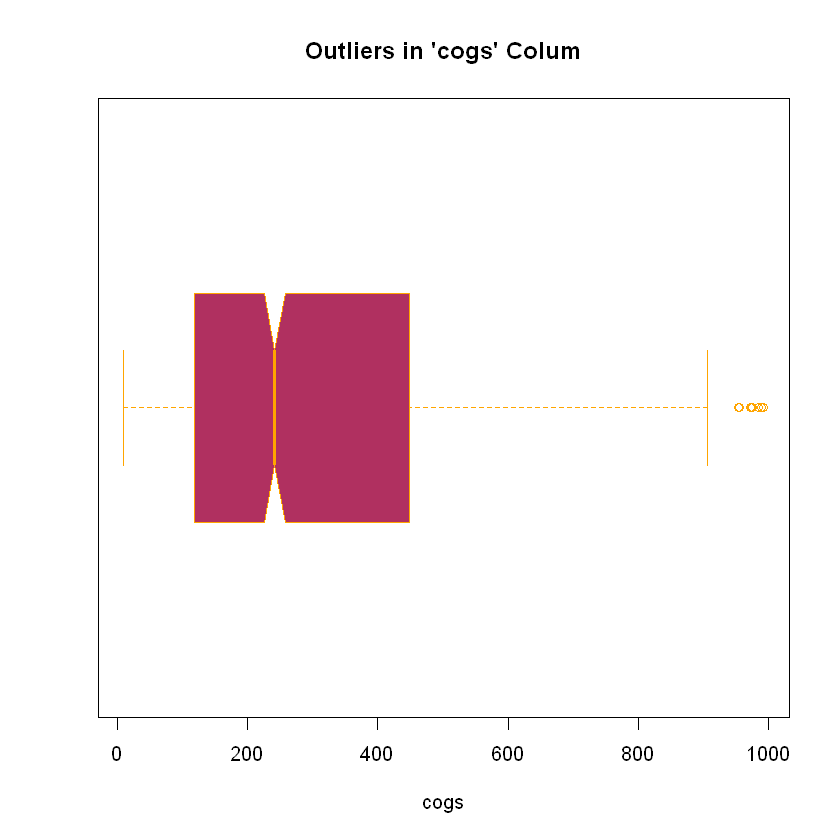

In [55]:
boxplot(super$cogs,
main = "Outliers in 'cogs' Colum",
xlab = "cogs",
col = "maroon",
border = "orange",
horizontal = TRUE,
notch = TRUE
)

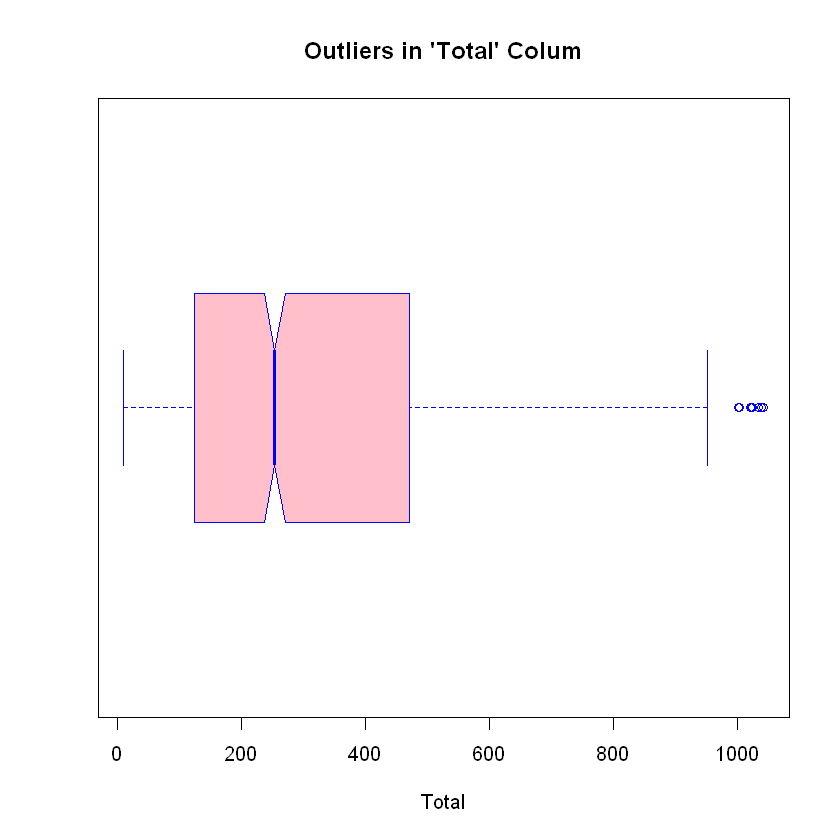

In [56]:
boxplot(super$Total,
main = "Outliers in 'Total' Colum",
xlab = "Total",
col = "pink",
border = "blue",
horizontal = TRUE,
notch = TRUE
)

<b>Observation</b>
<ul>
    <li>cogs, gross.income, Tax and Total columns are skewed to the left</li>
    <li>Rating and Unit.price are not normally distributed</li>
</ul>

In [57]:
str(super)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : Factor w/ 1000 levels "101-17-6199",..: 815 143 654 19 340 734 316 265 703 727 ...
 $ Branch                 : num  1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : num  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : num  1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : num  4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Time                   : Factor w/ 506 levels "10:00","10:01",..: 147 24 156 486 30 394 215 78 342 160 ...
 $ Payment                : num  3 1 2 3 3 3 3 3 2 2 ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ gross.income           : nu

Some variables do not have the right data type.

 - Invoice should be a character string
 - Date should be date time and not num

In [58]:
# Converting invoice id to character string.
super$Invoice.ID = as.character(super$Invoice.ID)

In [59]:
# Converting date and time to string

#Combining the two columns and converting the data type to data_time
super$Date_Time =  strptime(paste(super$Date, super$Time), format="%m/%d/%Y %M:%S")

In [60]:
# Checking the data types again
str(super)

'data.frame':	1000 obs. of  17 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : num  1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : num  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : num  1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : num  4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Time                   : Factor w/ 506 levels "10:00","10:01",..: 147 24 156 486 30 394 215 78 342 160 ...
 $ Payment                : num  3 1 2 3 3 3 3 3 2 2 ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ gross.income           : num  26.14 3.82 16.2

In [61]:
# Dropping the unecessary Date and Time columns.
super = super[,c(-9,-10)]
names(super)

[1] "Invoice.ID"              "Branch"                 
 [3] "Customer.type"           "Gender"                 
 [5] "Product.line"            "Unit.price"             
 [7] "Quantity"                "Tax"                    
 [9] "Payment"                 "cogs"                   
[11] "gross.margin.percentage" "gross.income"           
[13] "Rating"                  "Total"                  
[15] "Date_Time"

In [62]:
# select numeric columns

# Checking for outliers in the numerical columns
# Importing the library dplyr

library(dplyr)
super_num <- select_if(super, is.numeric)

Warning message in cor(data.num):
"the standard deviation is zero"

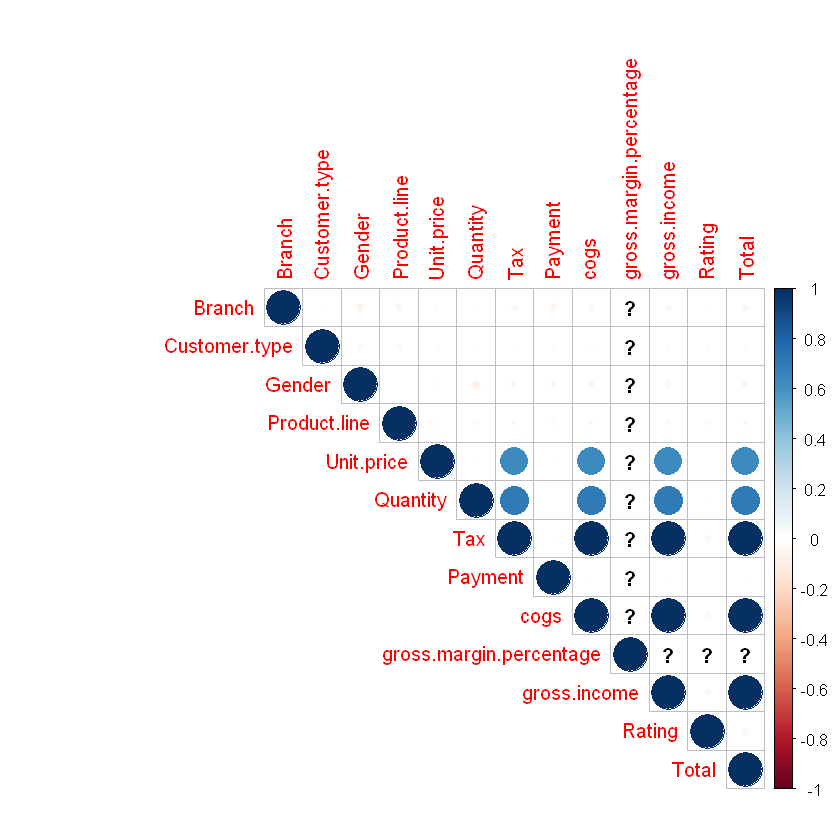

In [38]:
# Correlation Matrix
data.num <- super[, sapply(super, is.numeric)]
data.cor = cor(data.num)

library(corrplot)
corrplot(data.cor, type = 'upper')

#### Principal Component Analysis (PCA)

Principal component analysis is the unsupervised learning methodology in which the data is converted from a high dimensional space into another space with lower or equal number of dimensions. In this lower dimensional space, the dimensions are the projections of variance of data. 

Note that PCA can be applied only to numeric data.
 

In [64]:
names(super_num)

[1] "Branch"                  "Customer.type"          
 [3] "Gender"                  "Product.line"           
 [5] "Unit.price"              "Quantity"               
 [7] "Tax"                     "Payment"                
 [9] "cogs"                    "gross.margin.percentage"
[11] "gross.income"            "Rating"                 
[13] "Total"

In [65]:
super_num = super_num[,c(-4, -10)]
names(super_num)

[1] "Branch"        "Customer.type" "Gender"        "Unit.price"   
 [5] "Quantity"      "Tax"           "Payment"       "cogs"         
 [9] "gross.income"  "Rating"        "Total"

In [66]:
# We will use the numrical data and drop the categorical.
# Since algo cannot rescale a constant/zero column to unit variance, we drop gross.margin. production
# It only has one value 4.761905

# We then pass data.num to the prcomp(). 
# We set two arguments, center and scale to be TRUE then preview our object with summary

super_num.pca <- prcomp(super_num[, c(-5)], center = TRUE, scale. = T)
summary(super_num.pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.1144 1.0556 1.0085 0.98601 0.97719 0.96994 0.72791
Proportion of Variance 0.4471 0.1114 0.1017 0.09722 0.09549 0.09408 0.05298
Cumulative Proportion  0.4471 0.5585 0.6602 0.75745 0.85294 0.94702 1.00000
                             PC8      PC9      PC10
Standard deviation     1.683e-16 1.03e-16 3.866e-17
Proportion of Variance 0.000e+00 0.00e+00 0.000e+00
Cumulative Proportion  1.000e+00 1.00e+00 1.000e+00

Each explain a percentate of the total variation of the dataset'
- PC1 explains 44.71% of the total variance
- PC2 explains 11.14% of the variance and so on.

By PC7, we have 89% of the total variance explained by the components

In [67]:
# We then call str() to have a look at the PCA object.

str(super_num.pca)

List of 5
 $ sdev    : num [1:10] 2.114 1.056 1.009 0.986 0.977 ...
 $ rotation: num [1:10, 1:10] 0.0255 -0.0132 -0.0259 0.343 0.4691 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:10] "Branch" "Customer.type" "Gender" "Unit.price" ...
  .. ..$ : chr [1:10] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:10] 1.99 1.5 1.5 55.67 15.38 ...
  ..- attr(*, "names")= chr [1:10] "Branch" "Customer.type" "Gender" "Unit.price" ...
 $ scale   : Named num [1:10] 0.818 0.5 0.5 26.495 11.709 ...
  ..- attr(*, "names")= chr [1:10] "Branch" "Customer.type" "Gender" "Unit.price" ...
 $ x       : num [1:1000, 1:10] 1.9429 -2.3519 -0.0621 1.2289 2.7123 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:10] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


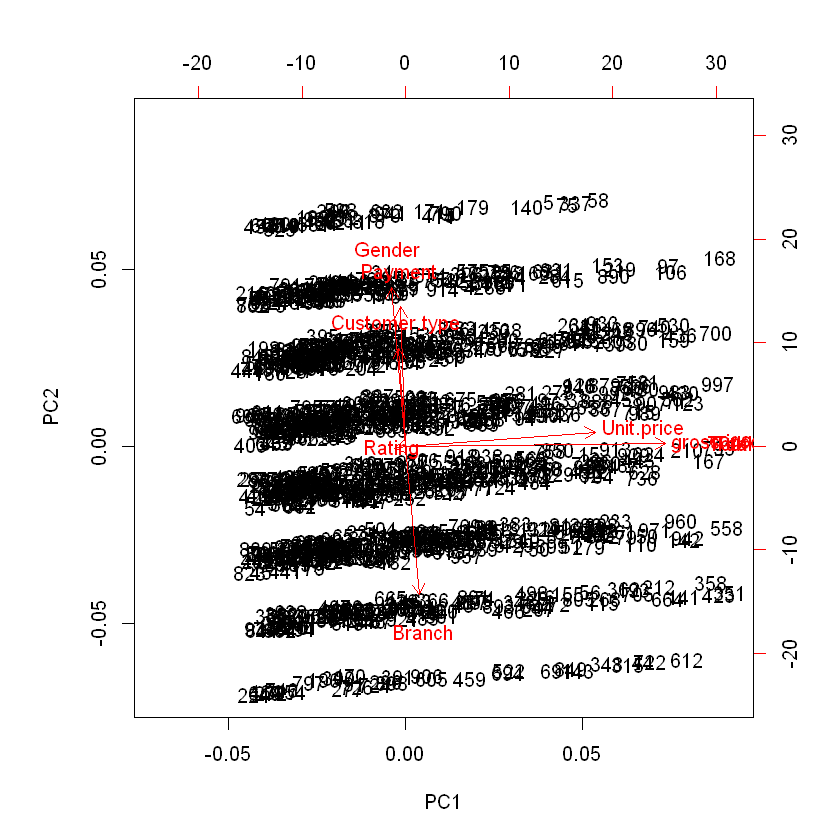

In [69]:
biplot(super_num.pca)